In [1]:
#say no to warnings!
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer,Dense
from tensorflow.keras.datasets.mnist import load_data as mnist_load_data
from tensorflow.keras.backend import clear_session

# Iris e matrice di confusione

In [3]:
iris = load_iris()
xtrain, xtest, ytrain, ytest = train_test_split(iris['data'],iris['target'])

In [4]:
def get_iris_net():
    tf.random.set_seed(2022)
    model = Sequential()
    model.add(InputLayer(input_shape=(4,)))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(3,activation='softmax'))
    return model

In [5]:
model = get_iris_net()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
predictions_before = model.predict(xtest)
predictions_before

array([[0.97704303, 0.01444575, 0.00851123],
       [0.9399149 , 0.03809953, 0.0219856 ],
       [0.9534545 , 0.0282326 , 0.01831291],
       [0.7770758 , 0.11928175, 0.10364246],
       [0.9455842 , 0.03239717, 0.02201863],
       [0.7873716 , 0.11833682, 0.09429164],
       [0.9550651 , 0.02762235, 0.01731252],
       [0.97545105, 0.01485932, 0.00968966],
       [0.92804796, 0.04142777, 0.03052427],
       [0.9199722 , 0.04665657, 0.03337125],
       [0.9601479 , 0.02359388, 0.0162581 ],
       [0.932437  , 0.03853341, 0.02902957],
       [0.98019654, 0.01302368, 0.00677983],
       [0.80610186, 0.10544462, 0.08845343],
       [0.9267862 , 0.04314266, 0.03007103],
       [0.7624826 , 0.12782037, 0.10969702],
       [0.76816434, 0.12463129, 0.10720434],
       [0.732337  , 0.1422621 , 0.12540089],
       [0.7818802 , 0.12070927, 0.09741054],
       [0.7824007 , 0.11697781, 0.10062151],
       [0.98584366, 0.0090493 , 0.00510697],
       [0.7171597 , 0.15074255, 0.13209774],
       [0.

In [7]:
pred_indexes_before = np.argmax(predictions_before,axis=1)

In [8]:
confusion_matrix(ytest,pred_indexes_before)

array([[15,  0,  0],
       [10,  0,  0],
       [13,  0,  0]])

In [9]:
np.unique(ytest,return_counts=True)

(array([0, 1, 2]), array([15, 10, 13]))

In [10]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50)

Train on 112 samples, validate on 38 samples
Epoch 1/50
112/112 [==============================] - 0s 4ms/sample - loss: 2.2667 - accuracy: 0.3125 - val_loss: 1.5265 - val_accuracy: 0.3947
Epoch 2/50
112/112 [==============================] - 0s 174us/sample - loss: 1.5093 - accuracy: 0.3125 - val_loss: 1.2533 - val_accuracy: 0.3947
Epoch 3/50
112/112 [==============================] - 0s 228us/sample - loss: 1.2618 - accuracy: 0.3125 - val_loss: 1.1239 - val_accuracy: 0.3947
Epoch 4/50
112/112 [==============================] - 0s 245us/sample - loss: 1.1355 - accuracy: 0.1875 - val_loss: 1.0746 - val_accuracy: 0.2105
Epoch 5/50
112/112 [==============================] - 0s 213us/sample - loss: 1.0775 - accuracy: 0.2143 - val_loss: 1.0453 - val_accuracy: 0.4737
Epoch 6/50
112/112 [==============================] - 0s 240us/sample - loss: 1.0410 - accuracy: 0.3929 - val_loss: 1.0255 - val_accuracy: 0.4737
Epoch 7/50
112/112 [==============================] - 0s 229us/sample - loss: 1.0

In [11]:
predictions_after = model.predict(xtest)
pred_indexes_after= np.argmax(predictions_after,axis=1)
pred_indexes_after

array([2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 0])

In [12]:
confusion_matrix(ytest,pred_indexes_after)

array([[15,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 11]])

# MNIST e analisi misclassificazione

In [13]:
(x_train, y_train), (x_test, y_test) = mnist_load_data()
num_datapoints_train = x_train.shape[0]
num_datapoints_test = x_test.shape[0]
x_train = np.reshape(x_train, [num_datapoints_train, -1])
x_test = np.reshape(x_test, [num_datapoints_test, -1])
x_train.shape
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [14]:
def get_mnist_mlp():
    model = Sequential()
    model.add(InputLayer(input_shape=(784,)))
    model.add(Dense(1000,activation='relu'))
    model.add(Dense(1000,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    return model

In [15]:
model = get_mnist_mlp()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2032 - accuracy: 0.9421 - val_loss: 0.1393 - val_accuracy: 0.9632
Epoch 2/2
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1203 - accuracy: 0.9716 - val_loss: 0.1588 - val_accuracy: 0.9612


In [16]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 72us/sample - loss: 0.1588 - accuracy: 0.9612


[0.1587614304990857, 0.9612]

In [17]:
predictions_after = model.predict(x_test)
pred_indexes_after= np.argmax(predictions_after,axis=1)
confusion_matrix(y_test,pred_indexes_after)

array([[ 972,    0,    1,    1,    0,    2,    2,    1,    1,    0],
       [   0, 1004,   11,    2,    0,    2,   18,    5,   92,    1],
       [   1,    0, 1015,    3,    1,    0,    5,    4,    2,    1],
       [   0,    0,    7,  973,    0,   17,    0,    4,    4,    5],
       [   1,    0,    3,    0,  936,    2,   14,    4,    0,   22],
       [   5,    0,    0,    3,    2,  871,    7,    0,    3,    1],
       [   5,    0,    2,    0,    1,    1,  946,    0,    3,    0],
       [   2,    0,   13,    5,    3,    1,    0,  999,    3,    2],
       [   2,    0,    4,    7,    4,   14,    4,    3,  932,    4],
       [   3,    0,    0,    9,    5,   16,    0,    5,    7,  964]])

In [18]:
cm = confusion_matrix(y_test,pred_indexes_after)
cm[range(10),range(10)]=0
cm

array([[ 0,  0,  1,  1,  0,  2,  2,  1,  1,  0],
       [ 0,  0, 11,  2,  0,  2, 18,  5, 92,  1],
       [ 1,  0,  0,  3,  1,  0,  5,  4,  2,  1],
       [ 0,  0,  7,  0,  0, 17,  0,  4,  4,  5],
       [ 1,  0,  3,  0,  0,  2, 14,  4,  0, 22],
       [ 5,  0,  0,  3,  2,  0,  7,  0,  3,  1],
       [ 5,  0,  2,  0,  1,  1,  0,  0,  3,  0],
       [ 2,  0, 13,  5,  3,  1,  0,  0,  3,  2],
       [ 2,  0,  4,  7,  4, 14,  4,  3,  0,  4],
       [ 3,  0,  0,  9,  5, 16,  0,  5,  7,  0]])

In [19]:
sum(cm.flatten())

388

In [20]:
1-(sum(cm.flatten())/len(y_test))

0.9612

In [21]:
misclassified = [i for i in range(len(y_test)) if y_test[i]!=pred_indexes_after[i]]
len(misclassified)

388

[1178 1760  321 7921 1865 5749 8540 1878 9692 8094 4140 2343]


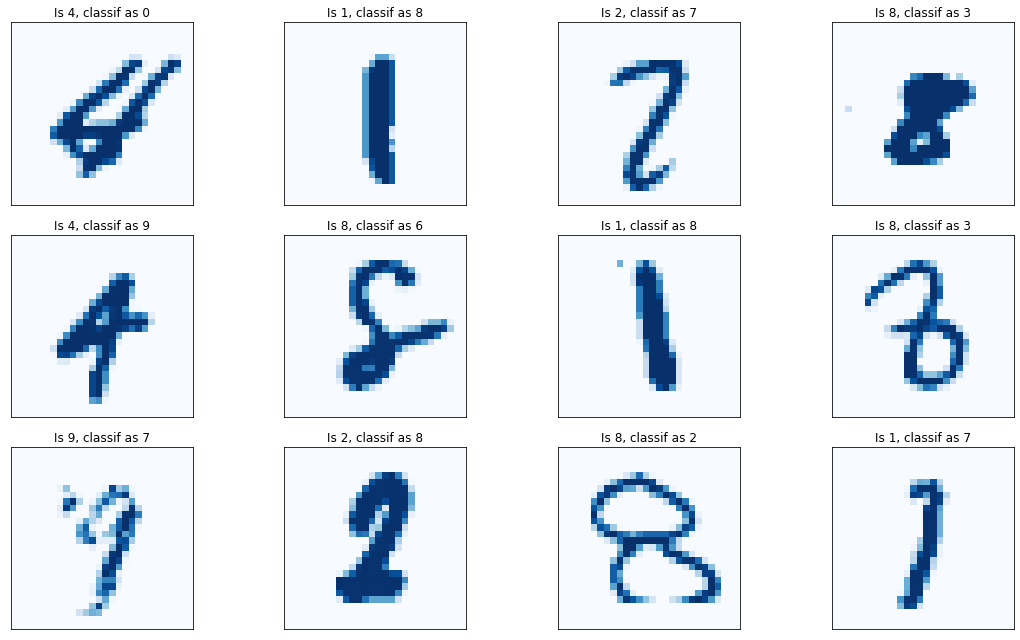

In [22]:
plt.figure(figsize=(16,9))
examples = np.random.choice(misclassified,12)
print(examples)
for i,e in enumerate(examples):
    plt.subplot(3,4,i+1)
    plt.imshow(x_test[e].reshape(28,28),cmap='Blues')
    plt.title('Is '+str(y_test[e])+', classif as '+str(pred_indexes_after[e]))
    plt.xticks([],[])
    plt.yticks([],[])
plt.tight_layout();